<a href="https://colab.research.google.com/github/ShlokArora2709/Data-science/blob/main/Growth_Analyst_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

file_path = '/content/drive/MyDrive/Active Users (4) (1) (1) (1) (1).xls'
df = pd.read_excel(file_path)
df.head()

                        w1                w2                w3  \
0         fd7c28f9fd8045f2  fd7c28f9fd8045f2  fd7c28f9fd8045f2   
1          673000000000000  5ff4cd01b5eae601  1402081a023d5c18   
2  15600000000000000000000  7cd4b3218dbffa0b  99acf0df83dc2831   
3         10156b703e26c334  25167a08527132ac  4820782b3cb8f570   
4         103f96126c333035  7fbf03c17ea12589  d8aaa5b13424da35   

                 w4                w5                w6                w7  \
0  fd7c28f9fd8045f2  fd7c28f9fd8045f2  231d91be38352d7a  306243851b716bf6   
1  45b649baf6882a4a  c92f828ffdd1c1c0  7c8de50e4a84f1ee  eff8ecf5cb54ffe7   
2  49740201a5f203eb  8cf94ff315895955  58453f722733b72e  7ec2e98a1613db6c   
3  ae16cc7b72fcee52  ecaa9c1913ef2f65  e02ecf94fd8ee5c8  1aba368c76311ef3   
4  bd26c51dd185a3cb  6028ea4b2b053007  b5c3d0e920ed6175  fa45dfe1357d3db9   

                 w8                w9               w10  ...  \
0  149f7dd1efe25ebc  191a909000d7123d  191a909000d7123d  ...   
1  b50740442

In [3]:
df.drop([ 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59'],axis=1,inplace=True)

In [9]:
week_columns=list(df.columns)

In [17]:
weekly_users = {
    week: set(df[week].dropna().astype(str))
    for week in week_columns
}

In [25]:
weeks = sorted(weekly_users.keys(), key=lambda x: int(x.strip('w')))
new_counts = []
retained_counts = []
resurrected_counts = []
churned_counts = []
quick_ratios = []
mau = []
retention_rates = []
users_seen = set()

In [26]:
for i, week in enumerate(weeks):
    current_users = weekly_users[week]
    mau.append(len(current_users))

    if i == 0:
        new = current_users
        retained = set()
        resurrected = set()
        churned = set()

        new_counts.append(len(new))
        retained_counts.append(np.nan)
        resurrected_counts.append(np.nan)
        churned_counts.append(np.nan)
        quick_ratios.append(np.nan)
        retention_rates.append(np.nan)
        users_seen = current_users.copy()
    else:
        prev_week = weeks[i - 1]
        prev_users = weekly_users[prev_week]
        new = current_users - users_seen
        retained = current_users & prev_users
        resurrected = (current_users - prev_users) & users_seen
        churned = prev_users - current_users
        users_seen.update(current_users)

        new_counts.append(len(new))
        retained_counts.append(len(retained))
        resurrected_counts.append(len(resurrected))
        churned_counts.append(len(churned))
        denominator = len(churned)
        qr = (len(new) + len(resurrected)) / denominator if denominator > 0 else np.nan
        quick_ratios.append(qr)

        retention_rate = (len(retained) / len(prev_users)) * 100 if len(prev_users) > 0 else np.nan
        retention_rates.append(retention_rate)

In [27]:
metrics_df = pd.DataFrame({
    'Week': weeks,
    'MAU': mau,
    'New': new_counts,
    'Retained': retained_counts,
    'Resurrected': resurrected_counts,
    'Churned': churned_counts,
    'Quick Ratio': quick_ratios,
    'Retention Rate': retention_rates
})
metrics_df.head()

,Week,MAU,New,Retained,Resurrected,Churned,Quick Ratio,Retention Rate
0,w1,1759,1759,NaN,NaN,NaN,NaN,NaN
1,w2,1654,723,931.0,0.0,828.0,0.873188,52.927800
2,w3,1732,645,1000.0,87.0,654.0,1.119266,60.459492
3,w4,2116,722,1169.0,225.0,563.0,1.682060,67.494226
4,w5,2193,674,1394.0,125.0,722.0,1.106648,65.879017


In [ ]:
quick

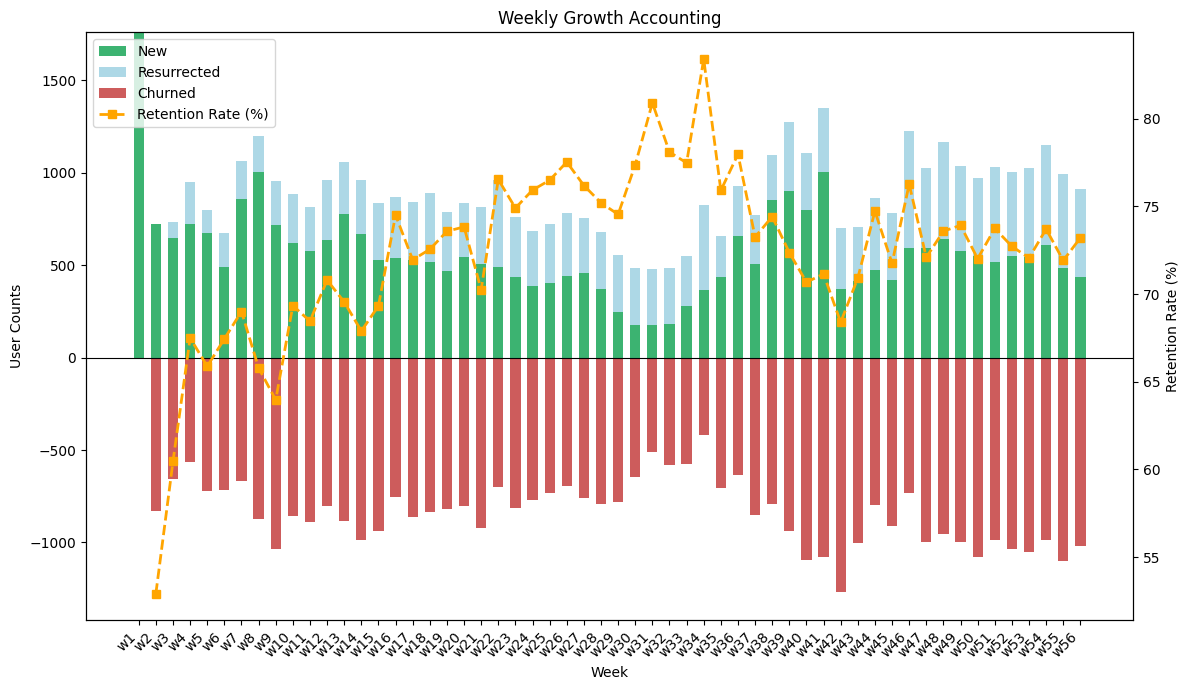

In [31]:
plot_df = metrics_df.dropna(subset=['New']).reset_index(drop=True)

x = np.arange(len(plot_df))
width = 0.6

fig, ax = plt.subplots(figsize=(12, 7))
bar_new = ax.bar(x, plot_df['New'], width, label='New', color='mediumseagreen')
bar_res = ax.bar(x, plot_df['Resurrected'], width, bottom=plot_df['New'],
                 label='Resurrected', color='lightblue')

bar_churn = ax.bar(x, -plot_df['Churned'], width, label='Churned', color='indianred')
ax.set_ylabel('User Counts')
ax.set_xlabel('Week')
ax.set_title('Weekly Growth Accounting')
ax.set_xticks(x)
ax.set_xticklabels(plot_df['Week'], rotation=45, ha='right')
ax.axhline(0, color='black', linewidth=0.8)

ax2 = ax.twinx()
ax2.plot(x, plot_df['Retention Rate'], color='orange', marker='s', linestyle='--', linewidth=2, label='Retention Rate (%)')
ax2.set_ylabel('Retention Rate (%)')

bars = bar_new + bar_res + bar_churn
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

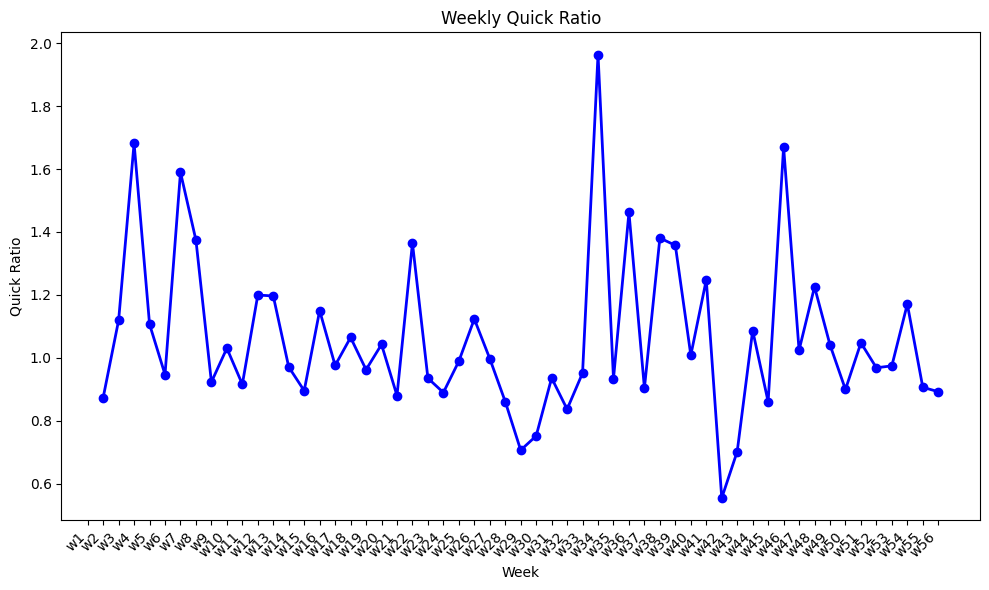

In [33]:
fig, ax2 = plt.subplots(figsize=(10, 6))

ax2.plot(x, plot_df['Quick Ratio'], color='blue', marker='o', linestyle='-', linewidth=2)
ax2.set_xlabel('Week')
ax2.set_ylabel('Quick Ratio')
ax2.set_title('Weekly Quick Ratio')
ax2.set_xticks(x)
ax2.set_xticklabels(plot_df['Week'], rotation=45, ha='right')


plt.tight_layout()
plt.show()

My analysis shows that during weeks 31 to 35, the app enjoyed significantly high retention rates, meaning users were consistently returning and engaging with the product. However, immediately after week 35, we notice a clear drop in retention alongside a spike in churn. The growth accounting graph confirms this trend by displaying strong positive contributions from new and resurrected users during the peak weeks, but these gains are later offset by high user churn. Similarly, the quick ratio graph mirrors these patterns, indicating that our gains from acquiring and reactivating users were not enough to counterbalance the losses. Additionally, the quick ratio remains below 1.4 for most of the graph, representing very little overall growth. From a business standpoint, while the high retention in weeks 31-35 points to a period of effective user engagement, the subsequent decline and increased churn signal a potential issue with keeping users long term. This suggests that we need to dig deeper into what changed after week 35 and focus on strategies to reduce churn, ensuring that our efforts in user acquisition translate into sustained growth and improved product-market fit.